In [2]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_theme()

In [3]:
path = "FinalProjectData"

data = pd.concat(
    [pd.read_csv(os.path.join(path, f)) for f in os.listdir(path) if f.endswith(".csv")]
)
data

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,5,3,3,4,3,3,3,5,107,Assign to CS
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,5,3,3,4,3,3,3,5,109,Assign to CS
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,4,2,2,3,3,2,3,4,91,Passed
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,3,2,2,3,3,2,3,4,80,Flagged
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,3,2,2,3,3,2,3,4,77,Flagged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,1,3,5,2,2,4,4,79,Flagged
2944,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,3,1,2,4,2,2,3,3,71,Flagged
2945,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,2,1,3,4,2,2,3,3,74,Flagged
2946,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,3,1,3,5,2,2,4,3,77,Flagged


# 1 Treatment effect

We will clearly define our tests before observing or analyzing the data to simulate the regulations that prevent data snooping in regulated industries. The goal is to determine if the treatment ( $\text{TxGroup} == \text{Treatment}$, which will be our preprocessing step ) has an effect on schizophrenia over time, as measured by the PANSS score ( $\text{PANSS\_Total}$ ). So, we want to see if there is a change in $\text{PANSS\_Total}$ over time, which can be determined by looking for a correlation between $\text{VisitDay}$ and $\text{PANSS\_Total}$ using a linear regression model:

$$\text{PANSS\_Total}=\hat{\beta_0}+\hat{\beta_1}\text{VisitDay}$$

Our null hypothesis is that the treatment has no effect, and we can reject the null hypothesis if and only if we find that $\hat{\beta_1}\neq 0$ with a $p<0.05$.

In [4]:
smf.ols(
    "PANSS_Total ~ VisitDay", data=data[data["TxGroup"] == "Treatment"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     5389.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:33:20   Log-Likelihood:                -46745.
No. Observations:               11249   AIC:                         9.349e+04
Df Residuals:                   11247   BIC:                         9.351e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8730      0.203    397.726      0.000      80.474      81.272
VisitDay      -0.1134      0.002    -73.407      0.000      -0.116      -0.110
==============================================================================
Omnibus:                      140.534   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.709
Skew:                           0.266   Prob(JB):                     1.39e-32
Kurtosis:                       3.175   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

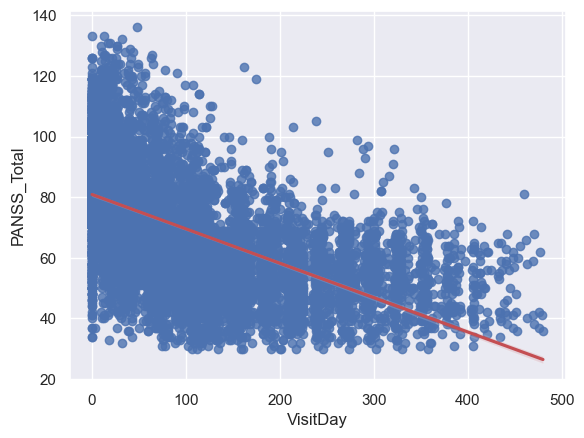

In [5]:
sns.regplot(
    x="VisitDay",
    y="PANSS_Total",
    data=data[data["TxGroup"] == "Treatment"],
    line_kws={"color": sns.color_palette()[3]},
)
plt.show()

This shows a p-value well below $0.05$ for a nonzero $\hat{\beta}_0$, so we reject the null hypothesis and can say that the treatment plan does improve the PANSS score over time. Additionally, the coefficient $\hat{\beta}_1\approx 0.1134$ indicates that the treatment will decrease the PANSS score by approximately $0.1134$ every day.

In [6]:
smf.ols(
    "PANSS_Total ~ VisitDay", data=data[data["TxGroup"] == "Control"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5982.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:33:20   Log-Likelihood:                -48474.
No. Observations:               11660   AIC:                         9.695e+04
Df Residuals:                   11658   BIC:                         9.697e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.3879      0.199    414.998      0.000      81.999      82.777
VisitDay      -0.1208      0.002    -77.346      0.000      -0.124      -0.118
==============================================================================
Omnibus:                      297.569   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.744
Skew:                           0.312   Prob(JB):                     1.72e-84
Kurtosis:                       3.636   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

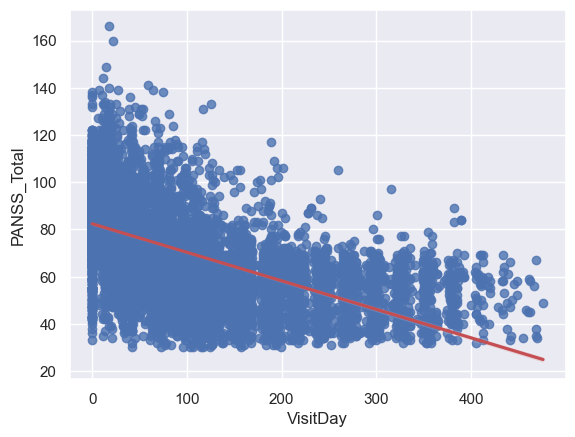

In [7]:
sns.regplot(
    x="VisitDay",
    y="PANSS_Total",
    data=data[data["TxGroup"] == "Control"],
    line_kws={"color": sns.color_palette()[3]},
)
plt.show()

We can say with statistical significance that the control treatment is more effective than the new treatment, with a $\hat{\beta'}_1\approx -0.1208$ versus $\hat{\beta}_1\approx -0.1134$, however, that does not mean that the new treatment is ineffective. For example, if it has other advantages like few side effects or lower cost, preventing the control treatment from being an option, this study showing the efficacy of the new treatment could be critical information. Overall, it is not more effective / an improvement over the control. However, **it is effective**.

# 2 Patient segmentation

First, we need to preprocess the data. We want to filter the data only to consider initial measurements of patients, and we want to scale each of the variables used in the evaluation to zero means and unit variance for equal emphasis on more and less sensitive measurements.

In [8]:
first_day_data = data[data["VisitDay"] == 0]
filtered_data = first_day_data.drop(
    [
        "Study",
        "Country",
        "PatientID",
        "SiteID",
        "RaterID",
        "AssessmentID",
        "TxGroup",
        "VisitDay",
        "PANSS_Total",
        "LeadStatus",
    ],
    axis=1,
)
scaled_data = pd.DataFrame(
    StandardScaler().fit_transform(filtered_data),
    columns=filtered_data.columns,
    index=filtered_data.index,
)

Now we can run a highirichical clustering to create a dendrogram since our dataset is relatively small

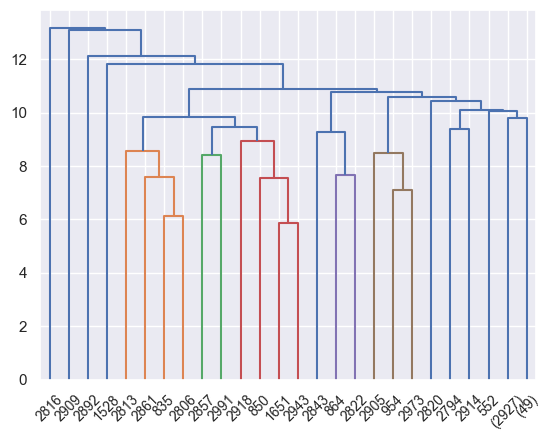

In [9]:
dendrogram(linkage(scaled_data, method="average"), truncate_mode="level", p=10)
plt.show()

There are either $3$ or $5$ clear groups, so $5$ seems more informative and preferable. To confirm these values, let's run a KMeans $n$ vs. $\text{error}$ to confirm this cluster size.

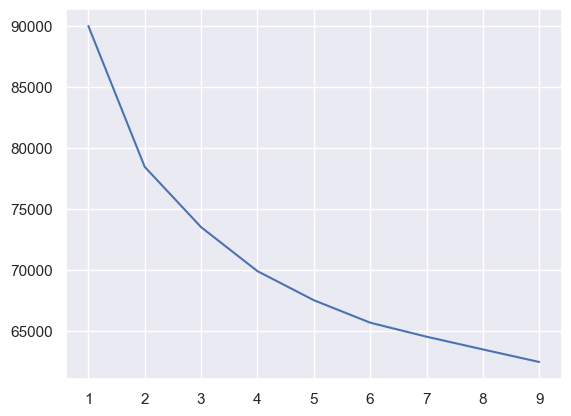

In [10]:
sns.lineplot(
    x=range(1, 10),
    y=[
        KMeans(n_clusters=n, random_state=42, n_init="auto").fit(scaled_data).inertia_
        for n in range(1, 10)
    ],
)
plt.show()

The new graph confirms that $5$ is a valid choice because it is not in a flattening zone but does not provide enough information to support $5$ or any other large value. So, let's go with $k=5$.

In [11]:
clusters = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(scaled_data).labels_
clusters_table = pd.DataFrame(
    [np.mean(scaled_data[clusters == n], axis=0) for n in range(0, 5)]
)
clusters_table

,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,...,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16
0,0.267662,0.509775,0.097430,0.617025,0.011114,0.284859,0.919847,0.604467,0.685306,0.968629,...,0.512391,1.104950,0.234001,0.579611,0.777271,0.786767,0.758123,0.861549,0.682021,0.430139
1,-1.111154,-1.075249,-0.631017,-0.914037,-0.359332,-1.045230,-0.755107,-0.594090,-0.821624,-0.891462,...,-0.444735,-0.728377,-0.995031,-0.499819,-1.089938,-0.910520,-0.945662,-0.812443,-1.184934,-0.974494
2,0.812168,0.848392,0.908386,0.293908,0.493072,0.910168,0.063273,0.209775,0.363648,-0.032400,...,0.085947,-0.149951,0.941061,0.321750,0.251424,-0.135765,0.145982,0.033581,0.503116,0.695103
3,-0.578564,-0.273002,-0.540467,-0.563931,-0.437137,-0.517038,-0.520129,0.426774,0.306700,0.293668,...,0.338810,-0.313615,-0.503312,-0.152722,0.002542,-0.083563,0.136748,-0.500389,-0.149572,-0.101643
4,0.349666,-0.208499,0.133418,0.419818,0.274351,0.161989,0.279825,-0.797727,-0.731710,-0.564680,...,-0.603781,0.072073,0.133596,-0.235693,-0.234499,0.082035,-0.358861,0.343226,-0.149208,-0.280175


In [12]:
pd.DataFrame(
    {
        "P1-P7": np.average(
            clusters_table[["P" + str(n) for n in range(1, 8)]], axis=1
        ),
        "N1-N7": np.average(
            clusters_table[["N" + str(n) for n in range(1, 8)]], axis=1
        ),
        "G1-G16": np.average(
            clusters_table[["G" + str(n) for n in range(1, 17)]], axis=1
        ),
    },
)

,P1-P7,N1-N7,G1-G16
0,0.386816,0.695681,0.442132
1,-0.841589,-0.768787,-0.791194
2,0.618481,0.203298,0.368725
3,-0.490038,0.232661,-0.135412
4,0.201510,-0.550886,-0.075064


The clusters that form are
- **Cluster 1:** Exhibit slightly more positive and significantly more negative and general schizophrenic metrics than average
- **Cluster 2:** Exhibit significantly less positive, negative, and general schizophrenic metrics than average
- **Cluster 3:** Exhibit significantly more positive, and slightly more negative and general schizophrenic metrics than average
- **Cluster 4:** Exhibit less positive, a tiny bit less general, and more negative schizophrenic metrics than average
- **Cluster 5:** Exhibit slightly more positive, less negative, and the tiniest bit less general metrics than average.
In these groups, groups $1$ and $3$ would be the most important to look into because they will be the most likely to have schizophrenia-related problems, and this shows approximately what type of problems may arise in those groups ( the generally more negative problem groups with still a significant amount of positive and general, and more positive groups with a significant amount of general and less negative ). This also provides the basis for further investigation into the specifics of each metric. However, as a simple clustering algorithm, these results should be taken lightly not to mean that groups $2$ and $4$ are the only important ones.

# 3 Forecasting



In [85]:
data_E = data[data.Study == "E"]

In [87]:
data_E

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,E,USA,50001,100010,150112,501017,Treatment,0,4,3,...,3,3,1,4,1,3,3,4,70,NaN
1,E,Russia,50002,100038,150015,500679,Control,0,3,4,...,3,1,4,3,3,1,3,3,82,NaN
2,E,Russia,50002,100038,150015,500930,Control,38,3,4,...,4,1,3,3,3,1,2,3,77,NaN
3,E,Russia,50002,100038,150015,502177,Control,78,3,4,...,3,1,3,3,3,1,3,3,75,NaN
4,E,Russia,50002,100038,150015,501533,Control,119,3,3,...,4,1,3,3,3,2,3,3,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,E,Russia,50512,100019,150056,501752,Treatment,83,3,3,...,3,1,3,3,4,1,2,3,66,NaN
1958,E,Russia,50512,100019,150056,501624,Treatment,125,3,2,...,3,1,3,3,3,1,2,3,60,NaN
1959,E,Russia,50512,100019,150056,501643,Treatment,168,2,2,...,2,3,3,3,3,1,2,1,54,NaN
1960,E,USA,50513,100050,150038,502061,Control,0,1,1,...,1,1,3,2,2,2,3,1,44,NaN
